In [15]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as pr

In [18]:
env = gym.make('FrozenLake-v0')

Q = np.zeros([env.observation_space.n,env.action_space.n]) #Initialize table with all zeros

dis = 0.99
learning_rate = .85
num_episodes = 100000 #set learning parameters

rList=[]
for i in range(num_episodes):
    state=env.reset() #reset environment
    rAll = 0
    done = False
    
    while not done:
        action = np.argmax(Q[state,:] + np.random.randn(1,env.action_space.n)/(i+1))
        new_state, reward, done,_ = env.step(action) #get new stse and reward from enviroment
        Q[state,action] = (1-learning_rate)*Q[state,action] + learning_rate*(reward+dis * np.max(Q[new_state,:]))
        rAll +=reward
        state = new_state
    rList.append(rAll)

Success rate: 0.55723
Rinal Q-Table Values
Left Down Right Up
[[1.16693179e-02 1.39302411e-03 5.01478827e-01 1.28034976e-02]
 [1.93443909e-03 1.70055824e-03 3.09963956e-04 3.04801519e-01]
 [2.99871941e-03 2.51371478e-03 2.01188945e-03 2.33223009e-01]
 [1.68308798e-03 0.00000000e+00 0.00000000e+00 1.88000376e-01]
 [6.24745494e-01 0.00000000e+00 9.49093377e-04 2.00737184e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.63198547e-01 6.18445070e-06 5.00760211e-07 1.40160098e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.19654399e-03 7.89618938e-01]
 [0.00000000e+00 8.29454263e-01 2.99800392e-04 0.00000000e+00]
 [2.30030036e-01 2.67173730e-05 0.00000000e+00 6.26122863e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 9.66612827e-01 0.00000000e+00]
 [0.00000000e+00 9.99883590e-01 0.00000000e+00 0.0000000

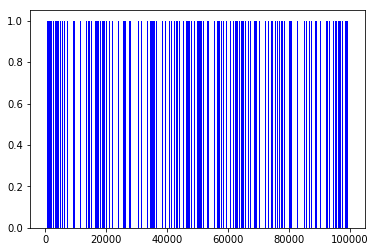

In [19]:
print("Success rate: " +str(sum(rList)/num_episodes))
print("Rinal Q-Table Values")
print("Left Down Right Up")
print(Q)
plt.bar(range(len(rList)),rList,color='blue')
plt.show()